In [3]:
import warnings
warnings.filterwarnings("ignore")
import cv2
import os
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from keras.applications import VGG16
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from sklearn.neural_network import MLPClassifier

In [4]:
data_path = r"D:\\flower_data (2)\\flower_data\\train"
img_size=256             
counter=0            
X=[]
Y=[]
 
categories=os.listdir(data_path)
 
for category in categories:                                                            # this loop to know how many images in categories
    folder_path=os.path.join(data_path,category)                                       # make folder empty has the same path for dataset
    img_names=os.listdir(folder_path)                                                  # put each image in this folder
 
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        fullpath=os.path.join(data_path,category,img_name)
        try:
            img = cv2.imread(fullpath, cv2.IMREAD_COLOR)
            img = cv2.resize(img, (img_size,img_size))
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            X.append(img)
            Y.append(category)
            counter+=1
            print("preprocessing Image Number==> ",counter)
        except:
            print("Error in ==> ",counter)
 
imgs=np.array(X)
lbls=np.array(Y)
del X
del Y

preprocessing Image Number==>  1
preprocessing Image Number==>  2
preprocessing Image Number==>  3
preprocessing Image Number==>  4
preprocessing Image Number==>  5
preprocessing Image Number==>  6
preprocessing Image Number==>  7
preprocessing Image Number==>  8
preprocessing Image Number==>  9
preprocessing Image Number==>  10
preprocessing Image Number==>  11
preprocessing Image Number==>  12
preprocessing Image Number==>  13
preprocessing Image Number==>  14
preprocessing Image Number==>  15
preprocessing Image Number==>  16
preprocessing Image Number==>  17
preprocessing Image Number==>  18
preprocessing Image Number==>  19
preprocessing Image Number==>  20
preprocessing Image Number==>  21
preprocessing Image Number==>  22
preprocessing Image Number==>  23
preprocessing Image Number==>  24
preprocessing Image Number==>  25
preprocessing Image Number==>  26
preprocessing Image Number==>  27
preprocessing Image Number==>  28
preprocessing Image Number==>  29
preprocessing Image Num

In [5]:
#Label Encoding
le = preprocessing.LabelEncoder()
le.fit(lbls)
lbls_encoded = le.transform(lbls)
 
#Train and Test Split
train_x, test_x,train_y, test_y = train_test_split(imgs,lbls_encoded,test_size=0.20,shuffle='true')
 
#Normalization

train_x, test_x = train_x/255.0,  test_x/255.0 


In [6]:
 
from keras.applications import VGG16
#Feature Extraction
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size,img_size, 3))
 
for layer in VGG_model.layers:
    layer.trainable = False
 
VGG_model.summary()  
feature_extractor=VGG_model.predict(train_x)
SVM_features_train = feature_extractor.reshape(feature_extractor.shape[0], -1)
feature_extractor_test=VGG_model.predict(test_x)
SVM_features_test = feature_extractor_test.reshape(feature_extractor_test.shape[0], -1)

  

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [9]:
SVCModel = SVC(C=0.5, kernel='linear', degree=3, gamma='auto', shrinking=True,
                probability=False, tol=0.0001, cache_size=10, class_weight=None,verbose=False,
                max_iter=-1, decision_function_shape='ovr', random_state =None)
SVM=SVCModel.fit(SVM_features_train, train_y)

y_preds = SVCModel.predict(SVM_features_test)
Accuracy = accuracy_score(test_y,y_preds)
print("Accuracy :", Accuracy)

Accuracy : 0.8684863523573201


In [10]:
test_y_Normal = le.inverse_transform(test_y)

[[ 5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0 15  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 1  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0
   0  1  0  0  0  0]
 [ 0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  1  0  0
   0  1  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  1  0  0  0  0  0  0  1  0
   0  0  0  0  0  0]
 [ 1  0  1  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0 

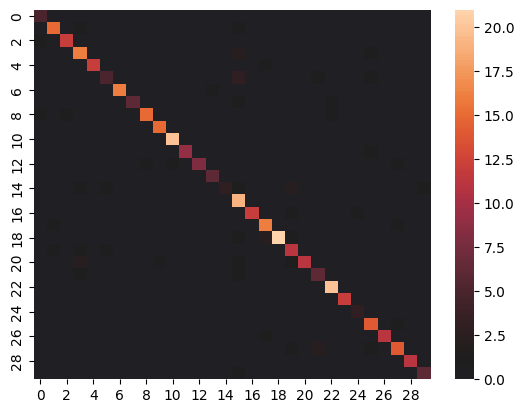

In [11]:
cm=confusion_matrix(test_y, y_preds)
print(cm)
print(classification_report(test_y, y_preds))
# drawing confusion matrix
sns.heatmap(cm, center = True)
plt.show()

AUC Value  :  0.9821428571428571


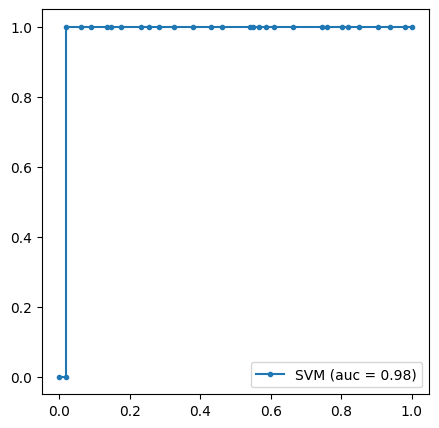

In [14]:
#Calculating ROC:  
#roc_curve(y_test, y_pred, pos_label=None, sample_weight=None,drop_intermediate=True)

fprValue, tprValue, thresholdsValue = roc_curve(test_y,y_preds,pos_label=28)
#print('fpr Value  : ', fprValue)
#print('tpr Value  : ', tprValue)
#print('thresholds Value  : ', thresholdsValue)

#Calculating Area Under the Curve AUC :  

fprValue2, tprValue2, thresholdsValue2 = roc_curve(test_y,y_preds,pos_label=28 )
AUCValue = auc(fprValue2, tprValue2)
print('AUC Value  : ', AUCValue)
plt.show()

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fprValue,tprValue, marker='.', label='SVM (auc = %0.2f)' % AUCValue)
plt.legend()
plt.show()


In [15]:

#Calculating Precision Score : (Specificity) #(TP / float(TP + FP))  
#precision_score(y_test, y_pred, labels=None, pos_label=1, average='binary',sample_weight=None)
RecallScore,PrecisionScore,f1_score,support=precision_recall_fscore_support(test_y, y_preds, average='macro')
print('Recall Score is : ', RecallScore)
print('Precision Score is : ', PrecisionScore)
print('f Score is : ', f1_score)
AccScore = accuracy_score(test_y, y_preds)
print('Accuracy Score is : ', AccScore)


Recall Score is :  0.8829989167133381
Precision Score is :  0.8616631527227503
f Score is :  0.8590951623118689
Accuracy Score is :  0.8684863523573201


In [21]:
feature_extractor.shape


(1609, 8, 8, 512)

In [22]:
feature_extractor_test.shape

(403, 8, 8, 512)

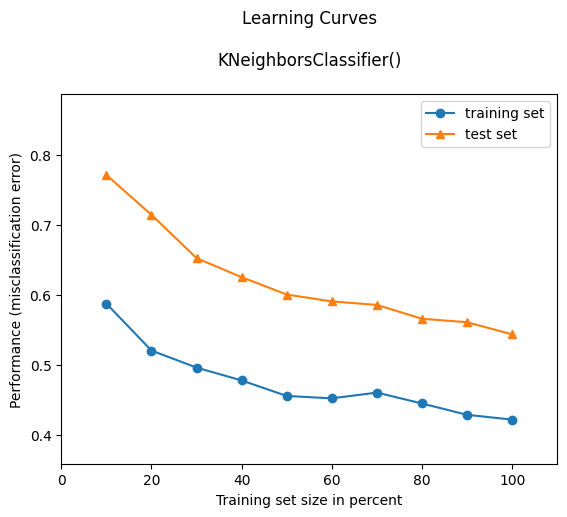

In [18]:
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
from mlxtend.data import mnist_data
from mlxtend.preprocessing import shuffle_arrays_unison
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
clf = KNeighborsClassifier(n_neighbors=5)

plot_learning_curves(SVM_features_train, train_y, SVM_features_test, test_y, clf)
plt.show()